In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import matplotlib.ticker as mticker

# Ustawienie polskiej lokalizacji (dla przecinków)
locale.setlocale(locale.LC_NUMERIC, 'pl_PL.UTF-8')


'pl_PL.UTF-8'

In [6]:
df = pd.read_csv('spearman_results.csv')
df

,dataset,model,entropy_corr,entropy_p,margin_corr,margin_p,displayed_dataset
0,go_emotions,gpt4omini,0.346145,3.675682e-55,-0.336896,3.594662e-52,GoEmotions
1,go_emotions,llama3,0.311072,2.388766e-44,-0.308026,1.781928e-43,GoEmotions
2,go_emotions,cohere,0.280451,4.918785e-36,-0.265492,2.459215e-32,GoEmotions
3,sst5,cohere,0.145658,3.745343e-06,-0.151791,1.421201e-06,SST5
4,sst5,gpt4omini,0.202296,1.074963e-10,-0.199786,1.838510e-10,SST5
5,sst5,llama3,0.260132,6.264292e-17,-0.255218,2.470053e-16,SST5
6,social_media,llama3,-0.111946,2.483697e-04,0.105288,5.715232e-04,SocialMedia
7,social_media,cohere,-0.200220,4.126896e-11,0.169885,2.358605e-08,SocialMedia
8,social_media,gpt4omini,-0.123819,5.004721e-05,0.124956,4.258883e-05,SocialMedia
9,20_newsgroups,gpt4omini,0.510032,6.732620e-133,-0.503242,7.079169e-129,20 Newsgroups


In [7]:
nowe_etykiety = ['Go Emotions', 'Go Emotions', 'Go Emotions', 'SST5', 'SST5', 'SST5',
                 'Social Media', 'Social Media', 'Social Media', '20 Newsgroups', '20 Newsgroups', '20 Newsgroups',
                 'Yahoo', 'Yahoo', 'Yahoo', 'Ag News', 'Ag News', 'Ag News']


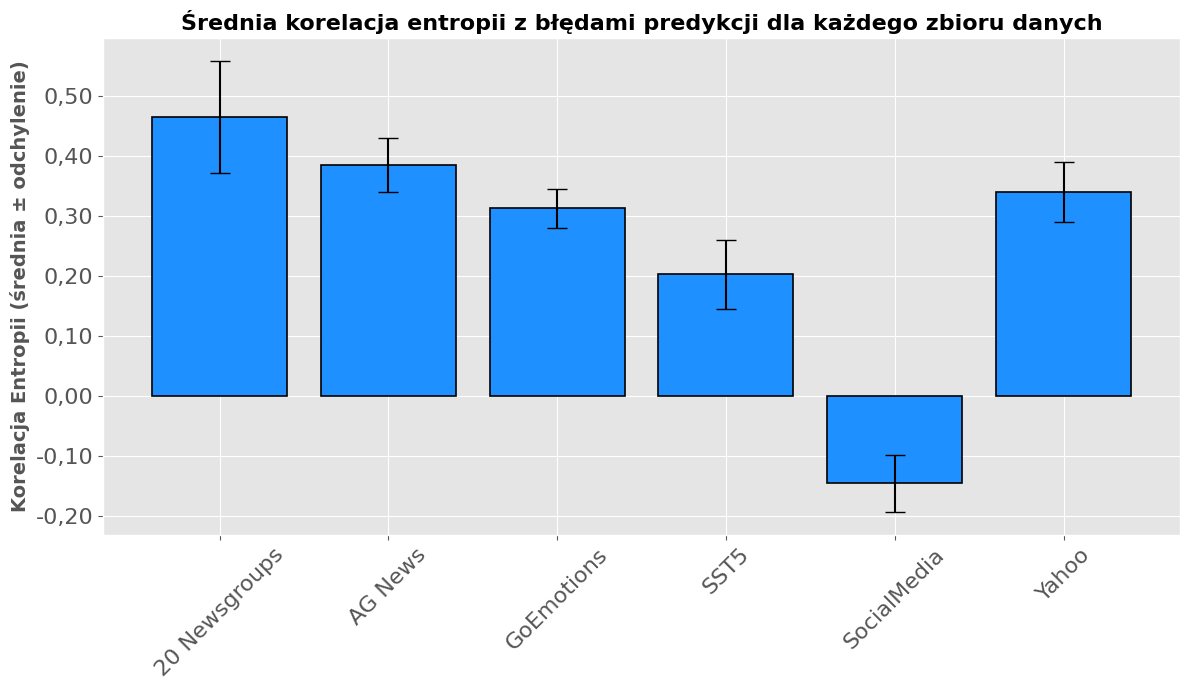

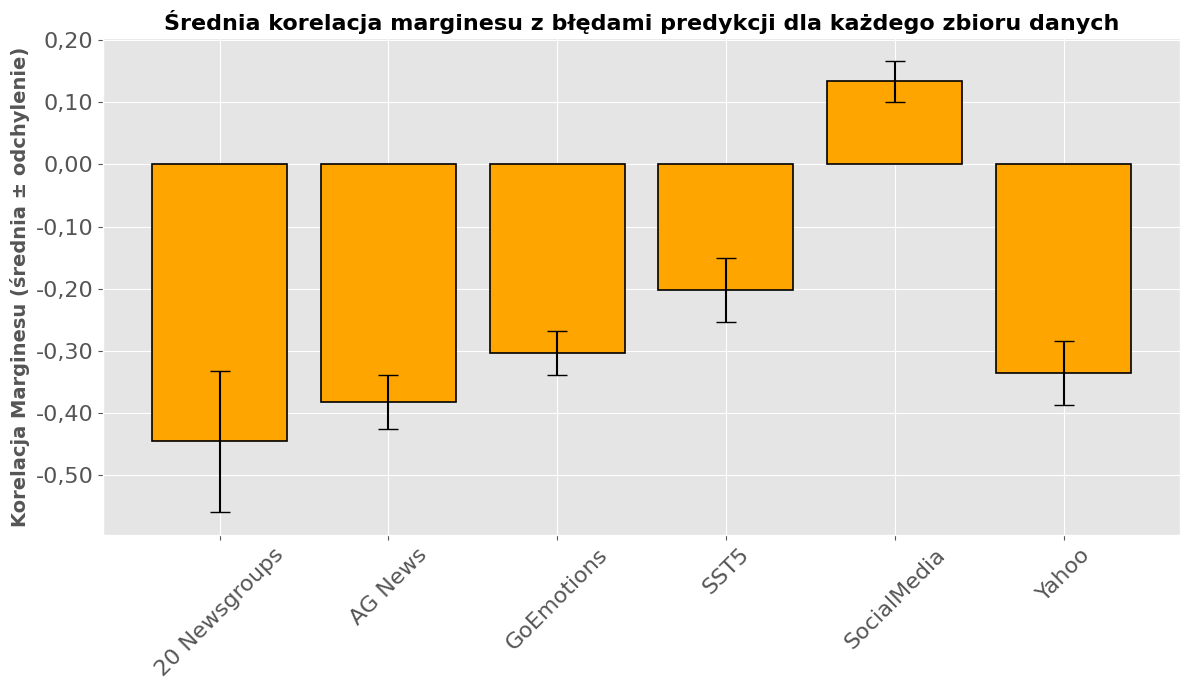

In [9]:
# Grupowanie po 'dataset' i obliczanie średniej oraz std tylko dla kolumn numerycznych
podsumowanie = df.groupby('displayed_dataset')[['entropy_corr', 'margin_corr']].agg(['mean', 'std'])

# Wydzielenie danych do wykresów
entropy_mean = podsumowanie['entropy_corr']['mean']
entropy_std = podsumowanie['entropy_corr']['std']

margin_mean = podsumowanie['margin_corr']['mean']
margin_std = podsumowanie['margin_corr']['std']

# Użycie nowoczesnego stylu
plt.style.use('ggplot')

# Wykres dla entropy_corr
plt.figure(figsize=(12, 7))
plt.bar(entropy_mean.index, entropy_mean.values, yerr=entropy_std.values, capsize=7, color='dodgerblue', edgecolor='black', linewidth=1.2)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace('.', ',')))

plt.ylabel('Korelacja Entropii (średnia ± odchylenie)', fontsize=14, weight='bold')
plt.title('Średnia korelacja entropii z błędami predykcji dla każdego zbioru danych', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.show()
plt.savefig('entropy_corr_plot.png', format='png')

# Wykres dla margin_corr
plt.figure(figsize=(12, 7))
plt.bar(margin_mean.index, margin_mean.values, yerr=margin_std.values, capsize=7, color='orange', edgecolor='black', linewidth=1.2)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace('.', ',')))

plt.ylabel('Korelacja Marginesu (średnia ± odchylenie)', fontsize=14, weight='bold')
plt.title('Średnia korelacja marginesu z błędami predykcji dla każdego zbioru danych', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.show()
plt.savefig('margin_corr_plot.png', format='png')